In [1]:
import numpy as np
import cv2

In [2]:
from main import ImageTextDetector
import matplotlib.pyplot as plt

In [3]:
imageTextD = ImageTextDetector()

In [4]:
text_images = imageTextD.get_text_from_image()

Loading weights from checkpoint (../neural_networks/CRAFT/craft_ic15_20k.pth)
Test image: books_images/book.jpg
elapsed time : 16.23669672012329s


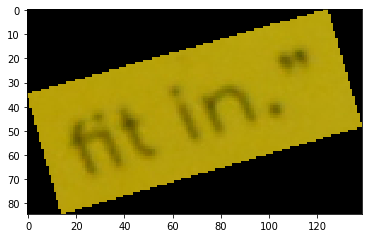

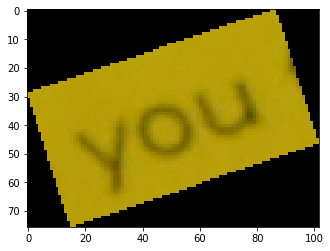

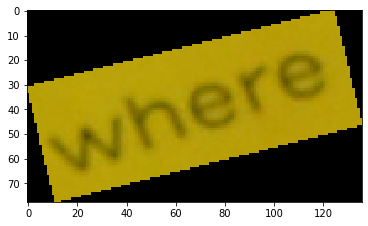

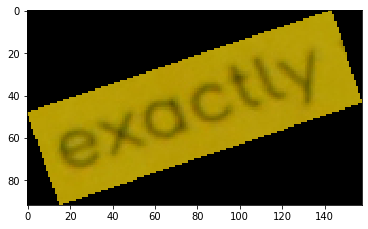

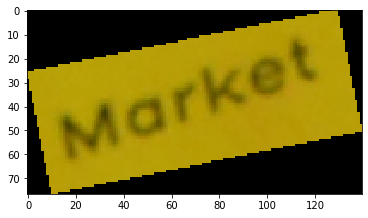

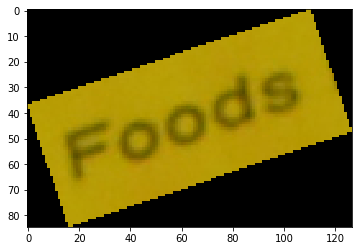

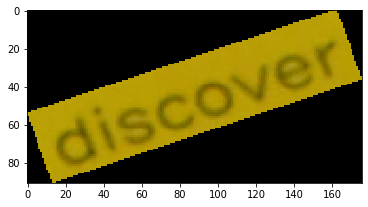

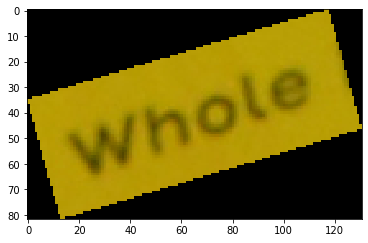

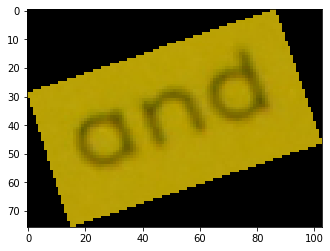

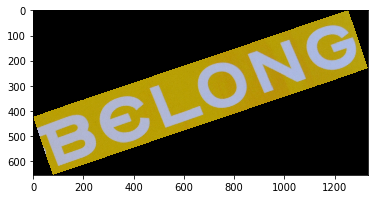

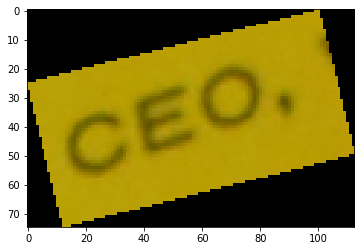

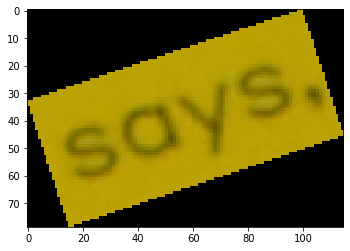

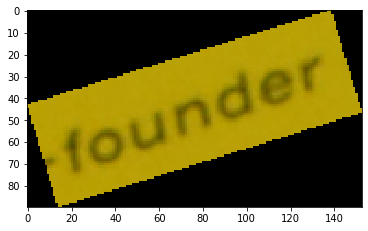

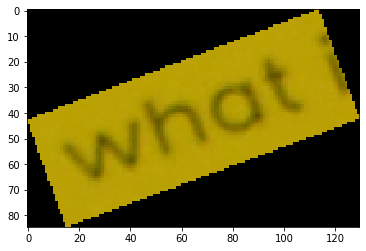

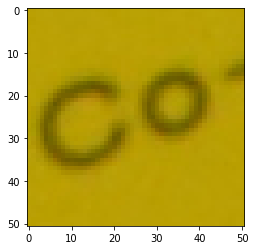

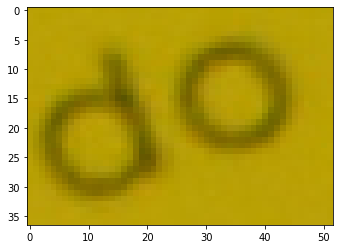

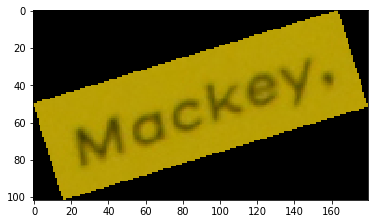

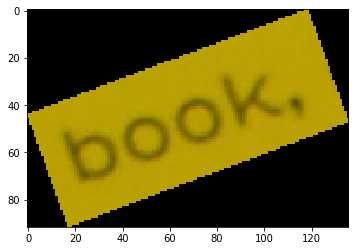

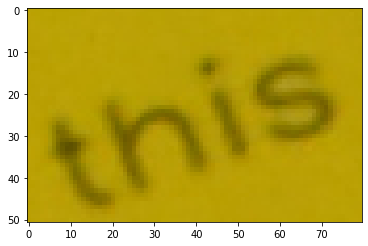

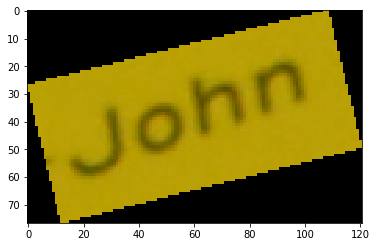

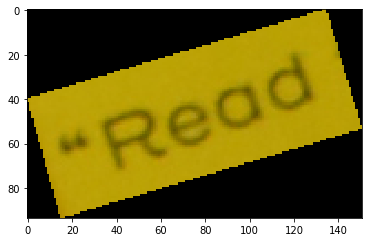

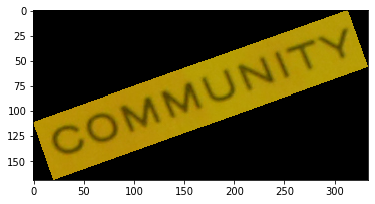

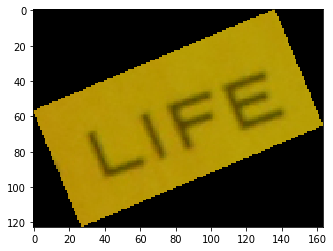

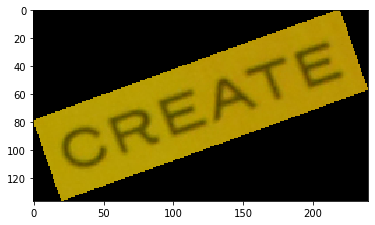

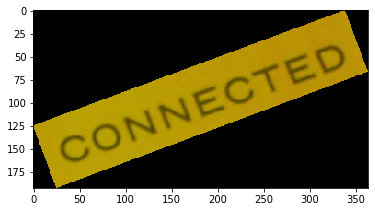

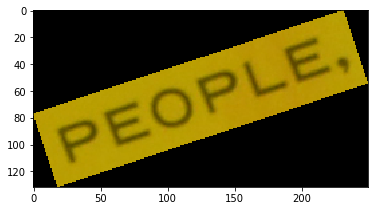

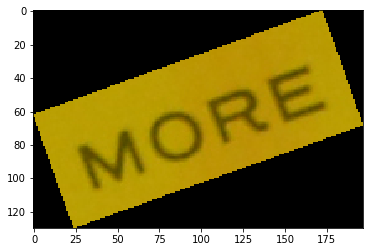

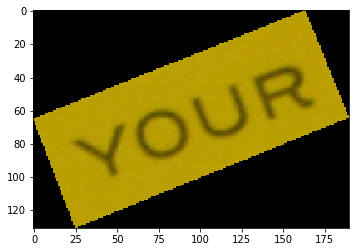

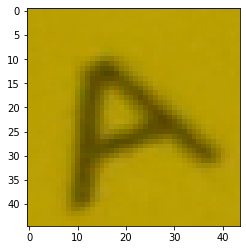

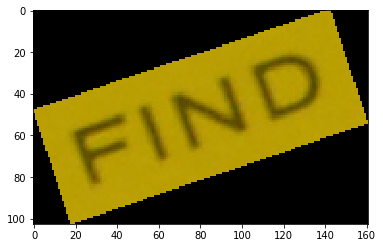

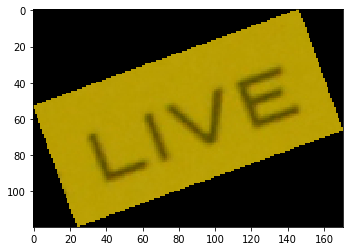

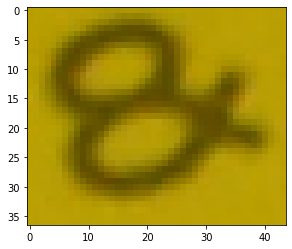

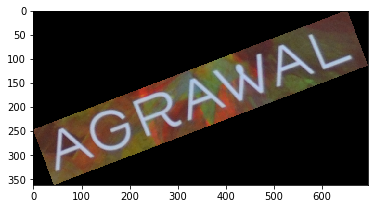

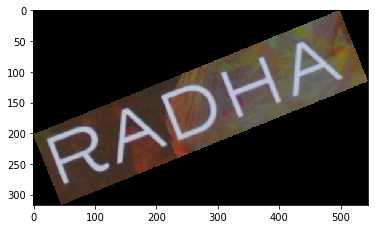

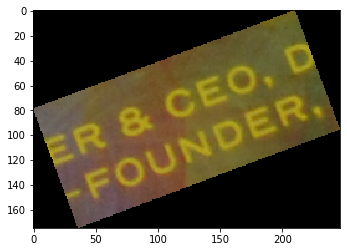

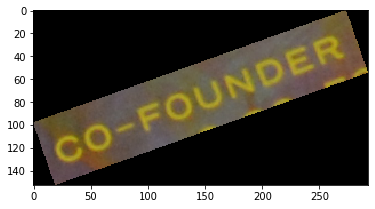

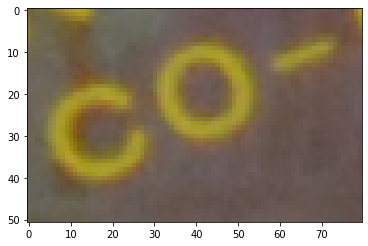

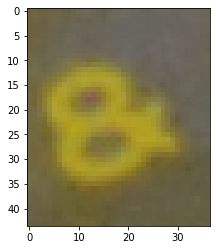

In [5]:
for text_img in text_images:
    plt.imshow(text_img)
    plt.show()

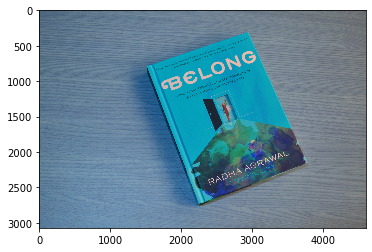

In [15]:
img_oryginal = cv2.imread('books_images/book.jpg')
img = img_oryginal.copy()
plt.imshow(img)
plt.show()